# Percy Jackson Books vs Fanfictions

# Table of Contents
 1. [Importing General Libraries and Data Sets](#import)
 2. [Data Cleaning](#cleaning)
 
     1. [Percy Jackson Books](#percy_data)
     2. [Percy Jackson Fanfictions](#ff_data)
     
 3. [Data Exploration](#explore)
 4. [Modeling](#modeling)
 
     1. [Splitting the Data](#split)
     2. [Decision Tree](#tree1)
     3. [Random Forest](#forest1)
     4. [Assessing the Classifiers](#assess1)
     
 5. [Further Explorations](#further)
     1. [Decision Tree](#tree2)
     2. [Random Forest](#forest2)
     3. [Assessing the Classifiers](#assess2)

## Importing Libraries and Data Sets <a class="anchor" id="import"></a>

In [1]:
import regex as re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
percy = pd.read_csv('percy_books.csv')
percy.head()

,Unnamed: 0,text
0,0,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...
1,1,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...
2,2,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...
3,3,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...
4,4,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...


In [3]:
fanfics = pd.read_csv('outputs.csv')
fanfics.head()

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,2482184,Those walls I built didn't even put up a fight,['Aza (sazandorable)'],General Audiences,M/M,"The Heroes of Olympus - Rick Riordan, Percy Ja...","Nico di Angelo/Will Solace, Nico di Angelo & W...","Nico di Angelo, Will Solace, and a whole bunch...","Those Three Days At The Infirmary, Slow Build,...",English,...,2014-10-20,14214,1/1,315.0,13366.0,2651.0,159001,"['everythingislegalinnewjersey', 'AmitySimp', ...",[],"""So that's dealt with,"" Will said...."
1,25747774,The Request Revolution,['tiredpjofan'],General Audiences,NaN,Percy Jackson and the Olympians - Rick Riordan...,"Annabeth Chase/Percy Jackson, Nico di Angelo/W...","Percy Jackson, Annabeth Chase (Percy Jackson),...","Percy Jackson is a Good Bro, Friendly Percy Ja...",English,...,2020-09-14,4754,3/3,208.0,7262.0,1197.0,47497,"['kattrina123', 'AlyMight23', 'Cup1dz_v3nuz', ...",[],Percy didn't mean to start a revolution agains...
2,8851033,Not So Shore,['bananannabeth'],General Audiences,F/M,Percy Jackson and the Olympians - Rick Riordan...,Annabeth Chase/Percy Jackson,"Annabeth Chase, Percy Jackson, Original Charac...","Mortals Meet Percabeth, but with a twist, I sw...",English,...,2016-12-14,9754,1/1,118.0,4917.0,1068.0,43754,"['hersheyheyhey', 'spooftime3394', 'hammybanan...",[],"\n\n \n\n \n\n \n\n""Hey, Kelly?""\n\nKelly loo..."
3,4318452,Of Storms and Bloodlines,['inkncoffee'],General Audiences,Gen,Percy Jackson and the Olympians & Related Fand...,Percy Jackson & Poseidon,"Percy Jackson, Poseidon (Percy Jackson), Sally...","Canon Compliant, Except Percy Is Emotionally A...",English,...,2015-08-21,12780,3/3,132.0,4740.0,1383.0,34548,"['Letsneverland', 'Geckos9', 'PrincessMoon1996...",[],Of all the obstacles in raising a demigod son ...
4,26277301,"Ancient History, Modern Times",['tearsofsaudade'],General Audiences,Gen,"Marvel Cinematic Universe, Percy Jackson and t...","Clint Barton & Percy Jackson, Clint Barton & N...","Clint Barton, Percy Jackson, Natasha Romanov (...","apollo kid clint barton, percy and clint hang ...",English,...,2022-02-18,3517,3/3,55.0,4687.0,662.0,31866,"['Nila06', 'ADefectiveWaffleIron', 'AcetheticG...",[],"Clint was the first one to notice the kid, may..."


In [4]:
# Setting the values of whether or not an excerpt is from a fanfiction. 0 for no and 1 for yes.

percy['ff'] = 0
fanfics['ff'] = 1

## Data Cleaning<a class="anchor" id="cleaning"></a>

### Percy Jackson Book Data<a class="anchor" id="percy_data"></a>

In [5]:
percy.head()

,Unnamed: 0,text,ff
0,0,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...,0
1,1,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...,0
2,2,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...,0
3,3,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...,0
4,4,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...,0


In [6]:
# function to count the number of words

def word_count(string):
    return len(string.split())

In [7]:
# function to count the number of paragraphs by using line breaks

def para_count(string):
    return len(string.split('\n'))

In [8]:
# function to count the lines of that start with dialouge by counting the number of 
# quotation marks at the beginning of a paragraph or after a regular (non-dialouge) sentence

def talk_count(string):
    return len(string.split('\n"')) + len(string.split('. "'))

In [9]:
# function to find median length of paragraphs

def para_len_median(string):
    lengths = []
    paragraphs = string.split('\n')
    for i in range(len(paragraphs)):
        lengths.append(len(paragraphs[i]))
    return int(np.percentile(lengths, 50))

def para_len_25th(string):
    lengths = []
    paragraphs = string.split('\n')
    for i in range(len(paragraphs)):
        lengths.append(len(paragraphs[i]))
    return int(np.percentile(lengths, 25))

def para_len_75th(string):
    lengths = []
    paragraphs = string.split('\n')
    for i in range(len(paragraphs)):
        lengths.append(len(paragraphs[i]))
    return int(np.percentile(lengths, 75))

def para_len_mean(string):
    lengths = []
    paragraphs = string.split('\n')
    for i in range(len(paragraphs)):
        lengths.append(len(paragraphs[i]))
    return int(np.mean(lengths))

In [10]:
# function to count how many times slang in the forms of words like gonna, wanna, etc appear

def slang(string):
    return string.count('gotta') + string.count('gonna') + string.count('wanna') + string.count('kinda') + string.count('lemme')

In [11]:
# importing tools to calculate lexical diversity

import sys
!{sys.executable} -m pip install \lexical-diversity
from lexical_diversity import lex_div as ld

In [12]:
# function to calculate lexical diversity of each piece

def lex_div(string):
    flt = ld.flemmatize(string)
    return ld.mtld(flt)

In [13]:
percy['words'] = percy['text'].apply(word_count)
percy['paragraph'] = percy['text'].apply(para_count)
percy['dialouge'] = percy['text'].apply(talk_count)
percy['para_len_median'] = percy['text'].apply(para_len_median)
percy['para_len_25th'] = percy['text'].apply(para_len_25th)
percy['para_len_75th'] = percy['text'].apply(para_len_75th)
percy['para_len_mean'] = percy['text'].apply(para_len_mean)
percy['slang'] = percy['text'].apply(slang)
percy['diversity'] = percy['text'].apply(lex_div)
percy = percy.drop(columns = ['Unnamed: 0'])

In [14]:
percy

,text,ff,words,paragraph,dialouge,para_len_median,para_len_25th,para_len_75th,para_len_mean,slang,diversity
0,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...,0,87479,3721,2735,99,50,171,128,6,120.727995
1,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...,0,82188,3511,2588,99,50,171,128,6,120.060620
2,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...,0,77326,3325,2453,98,50,170,127,4,120.402710
3,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...,0,74105,3189,2347,98,50,169,127,4,120.498334
4,1 I ACCIDENTALLY VAPORIZE MY PRE-ALGEBRA TEACH...,0,69183,2994,2208,98,49,168,126,4,120.813372
...,...,...,...,...,...,...,...,...,...,...,...
854,18 MY PARENTS GO COMMANDO\nBy the time we got ...,0,14637,625,542,98,55,168,130,0,125.148482
855,18 MY PARENTS GO COMMANDO\nBy the time we got ...,0,11725,481,412,102,60,172,135,0,123.830184
856,19 WE TRASH THE ETERNAL CITY\nThe bridge to Ol...,0,14292,603,534,100,55,172,131,0,124.903225
857,19 WE TRASH THE ETERNAL CITY\nThe bridge to Ol...,0,12652,546,482,97,54,165,128,0,123.463947


### Percy Jackson Fanfiction Data<a class="anchor" id="ff_data"></a>

In [15]:
print(list(fanfics.columns))

['work_id', 'title', 'author', 'rating', 'category', 'fandom', 'relationship', 'character', 'additional tags', 'language', 'published', 'status', 'status date', 'words', 'chapters', 'comments', 'kudos', 'bookmarks', 'hits', 'all_kudos', 'all_bookmarks', 'body', 'ff']


In [16]:
# filtered to only include "General Audiences" fanfiction to make sure that the fanfics are
# still somehow similar to the actual books in terms of content and maturity

fanfics = fanfics[fanfics['rating'] == "General Audiences"]

In [17]:
fanfics = fanfics[['body', 'ff', 'words']]

fanfics

,body,ff,words
0,"""So that's dealt with,"" Will said....",1,14214
1,Percy didn't mean to start a revolution agains...,1,4754
2,"\n\n \n\n \n\n \n\n""Hey, Kelly?""\n\nKelly loo...",1,9754
3,Of all the obstacles in raising a demigod son ...,1,12780
4,"Clint was the first one to notice the kid, may...",1,3517
...,...,...,...
1459,Amber Jones was a very different girl indeed. ...,1,9695
1460,How Aurora ended up in a gymnasium full of fir...,1,50485
1461,"\nChildren of Olympus\n\nBook Two\n\n\n\n""Birt...",1,27706
1462,"I am a fangirl, just like everyone out there. ...",1,31965


In [18]:
# text cleaning for each fanfiction

# removing space from empty lines
# removing non alphanumeric characters in empty lines (dividers)
# removing non alphanumeric characters in surrounded by spaces (dividers)
# removing empty lines
# removing empty lines with spaces

def clean(raw):
    cleaned_third = re.sub(r'\n\s+', '\n', raw)
    cleaned_third = re.sub(r'\n+\W+\n', '\n', cleaned_third)
#     cleaned_third = re.sub(r'\s+\W+\s', '\s', cleaned_third)
    cleaned_third = re.sub(r'\n+', '\n', cleaned_third)
#     cleaned_third = re.sub(r'”\s“', '"\n"', cleaned_third)
#     cleaned_third = re.sub(r'" "', '"\n"', cleaned_third)
    cleaned_third = re.sub(r'\n+\s+\n+', '\n', cleaned_third)
#     cleaned_third = re.sub(r'\n+', '\n', cleaned_third)
#     cleaned_third = re.sub(r'\s+', ' ', cleaned_third)
    
    return cleaned_third

In [19]:
fanfics['text'] = fanfics['body'].apply(clean)
fanfics

,body,ff,words,text
0,"""So that's dealt with,"" Will said....",1,14214,"""So that's dealt with,"" Will said...."
1,Percy didn't mean to start a revolution agains...,1,4754,Percy didn't mean to start a revolution agains...
2,"\n\n \n\n \n\n \n\n""Hey, Kelly?""\n\nKelly loo...",1,9754,"\n""Hey, Kelly?""\nKelly looked up from her bio..."
3,Of all the obstacles in raising a demigod son ...,1,12780,Of all the obstacles in raising a demigod son ...
4,"Clint was the first one to notice the kid, may...",1,3517,"Clint was the first one to notice the kid, may..."
...,...,...,...,...
1459,Amber Jones was a very different girl indeed. ...,1,9695,Amber Jones was a very different girl indeed. ...
1460,How Aurora ended up in a gymnasium full of fir...,1,50485,How Aurora ended up in a gymnasium full of fir...
1461,"\nChildren of Olympus\n\nBook Two\n\n\n\n""Birt...",1,27706,"\nChildren of Olympus\nBook Two\n""Birthed by B..."
1462,"I am a fangirl, just like everyone out there. ...",1,31965,"I am a fangirl, just like everyone out there. ..."


In [20]:
print(list(percy.columns))

['text', 'ff', 'words', 'paragraph', 'dialouge', 'para_len_median', 'para_len_25th', 'para_len_75th', 'para_len_mean', 'slang', 'diversity']


In [21]:
# to get the same features as the percy_book data set
fanfics = fanfics[['text','ff', 'words']]
fanfics['paragraph'] = fanfics['text'].apply(para_count)
fanfics['dialouge'] = fanfics['text'].apply(talk_count)
fanfics['para_len_median'] = fanfics['text'].apply(para_len_median)
fanfics['para_len_25th'] = fanfics['text'].apply(para_len_25th)
fanfics['para_len_75th'] = fanfics['text'].apply(para_len_75th)
fanfics['para_len_mean'] = fanfics['text'].apply(para_len_mean)
fanfics['slang'] = fanfics['text'].apply(slang)
fanfics['diversity'] = fanfics['text'].apply(lex_div)

# to get a word count within the same range
fanfics = fanfics[fanfics['words'] >= 8500]
fanfics = fanfics[fanfics['words'] <= 90000]
fanfics.head()

,text,ff,words,paragraph,dialouge,para_len_median,para_len_25th,para_len_75th,para_len_mean,slang,diversity
0,"""So that's dealt with,"" Will said....",1,14214,495,362,113,54,217,162,2,124.072069
2,"\n""Hey, Kelly?""\nKelly looked up from her bio...",1,9754,430,362,105,67,165,128,2,119.281633
3,Of all the obstacles in raising a demigod son ...,1,12780,404,268,129,68,239,180,5,97.839199
6,"\nWhen Percy wakes up, he's drowning.\nOnly me...",1,21890,1137,607,79,39,146,107,11,123.801163
7,"\nWhen they get to New York City, the first th...",1,32486,1542,790,88,42,168,118,10,122.997428


In [22]:
# processed_text = nlp(sample)

# # How many sentences are in the book (Pride & Prejudice)?
# sentences = [s for s in processed_text.sents]
# print(len(sentences))

# # Print sentences from index 10 to index 15, to make sure that we have parsed the correct book
# print(sentences[10:15])

# introduction_text = ('This tutorial is about Natural'
# ...     ' Language Processing in Spacy.')
# introduction_doc = nlp(sample)

# sentences = list(introduction_doc.sents)
# len(sentences)
# >>> # Extract tokens for the given doc
# print ([token.text for token in introduction_doc])

In [23]:
# about_text = ('Gus Proto is a Python developer currently'
#                ' working for a London-based Fintech'
#                ' company. He is interested in learning'
#                ' Natural Language Processing.')
# about_doc = nlp(about_text)
# sentences = list(about_doc.sents)
# len(sentences)

# raw_text = 'Hello, world. Here are two sentences.'
# nlp = English()
# nlp.add_pipe(nlp.add_pipe('sentencizer'))
# doc = nlp(sample)
# sentences = [sent.string.strip() for sent in doc.sents]
# print(sentences)

## Data Exploration<a class="anchor" id="explore"></a>

In [24]:
# creating a words/para feature to account for different lengths

percy['words/para'] = percy['words']/percy['paragraph']
fanfics['words/para'] = fanfics['words']/fanfics['paragraph']

In [25]:
# there are more percy jackson excerpts than fanfictions so I will randomly sample 450 excerpts
percy = percy.sample(n = 450, replace = False, random_state = 42)

In [26]:
percy.describe()

,ff,words,paragraph,dialouge,para_len_median,para_len_25th,para_len_75th,para_len_mean,slang,diversity,words/para
count,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,0.0,38796.764444,1659.906667,1428.882222,99.637778,52.973333,169.704444,128.317778,2.471111,123.573331,23.365818
std,0.0,18457.737682,781.296783,705.987878,5.680420,3.824572,7.730956,5.226615,2.047392,5.119768,0.877329
min,0.0,8705.000000,401.000000,298.000000,85.000000,40.000000,149.000000,114.000000,0.000000,111.951998,21.033264
25%,0.0,23693.250000,1012.250000,844.500000,96.000000,51.000000,165.000000,125.000000,1.000000,120.359297,22.818542
50%,0.0,36193.500000,1553.500000,1308.000000,99.000000,52.000000,170.000000,128.000000,2.000000,122.880200,23.352766
75%,0.0,52036.000000,2242.250000,1903.500000,104.000000,55.000000,174.000000,132.000000,4.000000,127.686236,23.844024
max,0.0,89033.000000,3721.000000,3356.000000,114.000000,65.000000,210.000000,152.000000,9.000000,136.596250,27.687211


In [27]:
fanfics.describe()

,ff,words,paragraph,dialouge,para_len_median,para_len_25th,para_len_75th,para_len_mean,slang,diversity,words/para
count,466.0,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,1.0,22207.607296,799.068670,560.620172,178.826180,99.287554,297.864807,228.409871,8.130901,101.038999,41.672145
std,0.0,15846.593135,661.901708,537.535391,772.844367,664.570443,901.789815,789.340373,12.122583,14.913345,148.094765
min,1.0,8632.000000,4.000000,2.000000,15.000000,7.000000,31.000000,23.000000,0.000000,46.417815,4.030608
25%,1.0,10885.000000,360.250000,222.500000,90.250000,44.000000,171.250000,128.000000,1.000000,91.836001,23.011881
50%,1.0,14995.500000,536.000000,391.000000,113.000000,59.000000,221.000000,160.000000,4.000000,100.311870,29.118746
75%,1.0,29353.250000,980.000000,669.500000,156.500000,79.000000,278.750000,199.750000,11.000000,110.884895,36.680688
max,1.0,87907.000000,5052.000000,3704.000000,15535.000000,14336.000000,16835.000000,15637.000000,105.000000,142.141896,2935.500000


In [28]:
# creating the larger total data frame

df = pd.concat([percy, fanfics], ignore_index = True)

### Word Clouds

In [29]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

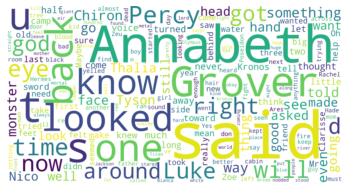

In [30]:
book_text = " ".join(text for text in percy.text)

word_cloud_book = WordCloud(collocations = False, background_color = 'white',
                        width = 2048 * 2, height = 1080 * 2).generate(book_text)
plt.imshow(word_cloud_book, interpolation='bilinear')
plt.axis("off")
plt.show()

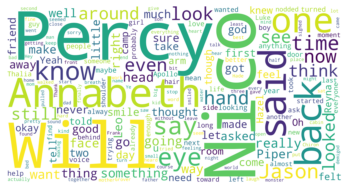

In [31]:
ff_text = " ".join(text for text in fanfics.text)

word_cloud_ff = WordCloud(collocations = False, background_color = 'white',
                        width = 2048 * 2, height = 1080 * 2).generate(ff_text)
plt.imshow(word_cloud_ff, interpolation='bilinear')
plt.axis("off")
plt.show()

### Histograms

Text(0.5, 1.0, 'Histogram of Word Counts')

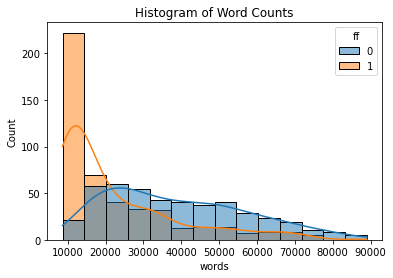

In [32]:
sns.histplot(data = df, x = "words", hue = 'ff', kde = True)
plt.title('Histogram of Word Counts')

Text(0.5, 1.0, 'Histogram of Paragraph Counts')

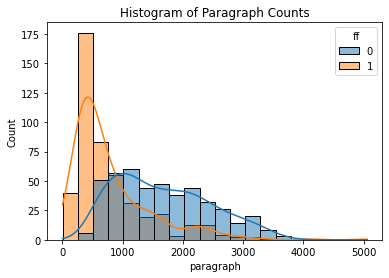

In [33]:
sns.histplot(data = df, x = "paragraph", hue = 'ff', kde = True)
plt.title('Histogram of Paragraph Counts')

Text(0.5, 1.0, 'Histogram of Median Paragraph Length')

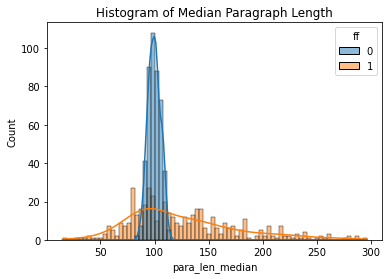

In [34]:
# filtered it to only include paragraphs with less than 300 words since there is such a 
# large range for fanfictions

sns.histplot(data = df[df['para_len_median'] < 300], x = "para_len_median", hue = 'ff', kde = True)
plt.title('Histogram of Median Paragraph Length')

Text(0.5, 1.0, 'Histogram of Slang Usage')

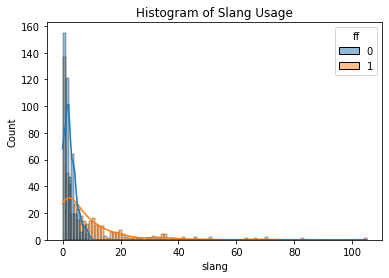

In [35]:
sns.histplot(data = df, x = "slang", hue = 'ff', kde = True)
plt.title('Histogram of Slang Usage')

Text(0.5, 1.0, 'Histogram of Lexical Diversity')

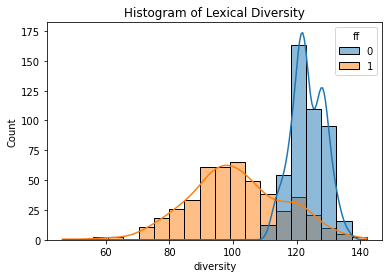

In [36]:
sns.histplot(data = df, x = "diversity", hue = 'ff', kde = True)
plt.title('Histogram of Lexical Diversity')

### Correlation Heat Map

Text(93.453125, 0.5, 'Features')

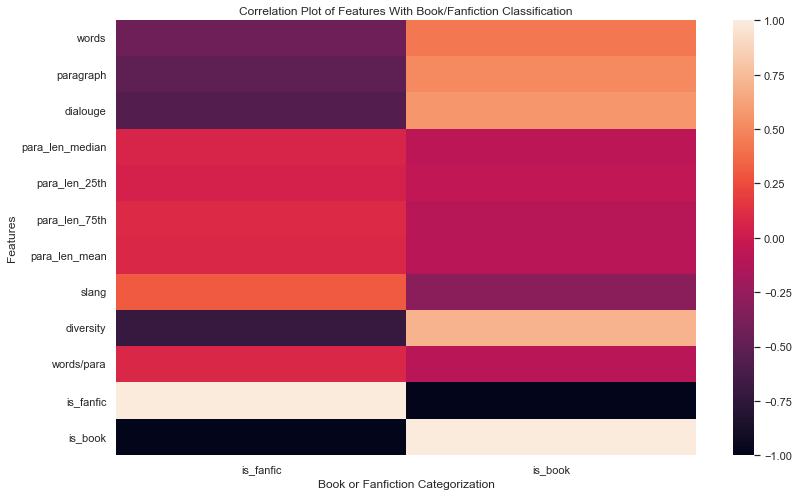

In [37]:
copy = df.drop(columns = ['ff'])
copy["is_fanfic"] = (df["ff"] == 1)
copy["is_book"] = (df["ff"] == 0)

sns.set(rc = {'figure.figsize':(13,8)})
sns.heatmap(data = copy.corr()[["is_fanfic", "is_book"]])
plt.title("Correlation Plot of Features With Book/Fanfiction Classification")
plt.xlabel("Book or Fanfiction Categorization")
plt.ylabel("Features")

In [38]:
# setting the chapter numbers to be an interger value instead of a string

# taking only fanfictions that are complete and have more than 5 chapters since the book 
# excerpts are 5 or more chapters too

# setting the rating to 'general audiences' to have a better comparison to the actual books

# import re
# def chap(chapters):
#     x = re.sub('\d+/', "", chapters)
#     return x

# fanfics['chapter'] = fanfics['chapters'].apply(chap)
# fanfics = fanfics[fanfics['chapter'] != '?']
# fanfics['chapter number'] = fanfics['chapter'].fillna(0).astype(int)

## Modeling<a class="anchor" id="modeling"></a>

### Creating a Train and Test Split<a class="anchor" id="splitting"></a>

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# creating the train and test split

original_train, test = train_test_split(df, test_size = 0.2, random_state = 43)
original_train = original_train.reset_index(drop = True)
test = test.reset_index(drop = True)
original_train.head()

,text,ff,words,paragraph,dialouge,para_len_median,para_len_25th,para_len_75th,para_len_mean,slang,diversity,words/para
0,6 AN OLD DEAD FRIEND COMES TO VISIT\nThe next ...,0,15237,647,543,100,52,171,128,2,114.556683,23.550232
1,12 RACHEL MAKES A BAD DEAL\nI grabbed Will Sol...,0,33716,1420,1238,104,59,172,132,0,131.330309,23.743662
2,7 MY DINNER GOES UP IN SMOKE \nWord of the bat...,0,22227,939,730,98,50,166,130,0,125.738786,23.670927
3,10 I RUIN A PERFECTLY GOOD BUS\nIt didn't take...,0,14420,638,490,101,51,159,123,0,122.532967,22.601881
4,"""Hey, Neeks!""\nOne sunny son of Apollo jogged ...",1,12154,378,365,141,82,239,178,6,117.354644,32.153439


In [41]:
# creating a validation and training set from the original_train

train, validation = train_test_split(original_train, test_size = 0.2, random_state =7)
train = train.reset_index(drop = True)
validation = validation.reset_index(drop = True)
train.head()

,text,ff,words,paragraph,dialouge,para_len_median,para_len_25th,para_len_75th,para_len_mean,slang,diversity,words/para
0,The first time Nico came into Bunker 9 was whe...,1,9738,260,180,180,92,265,200,2,82.976542,37.453846
1,"""Do you think if we hadn't met at the half-bl...",1,15800,459,276,122,57,196,190,2,94.264354,34.422658
2,\nPercy really didn't know how he ended up in ...,1,34269,980,495,182,108,265,193,10,101.862287,34.968367
3,3 WE PLAY TAG WITH SCORPIONS\nThe next morning...,0,68844,2981,2896,94,53,168,127,5,121.986733,23.094264
4,10 WE PLAY THE GAME SHOW OF DEATH\nWe did our ...,0,41144,1725,1692,97,54,174,131,1,120.656699,23.851594


### Decision Tree<a class="anchor" id="tree1"></a>

In [42]:
from sklearn import tree

In [43]:
# Making the X matrix for the train

X_table_tree = train.drop(columns = ['text', 'ff'])
X_matrix_tree = X_table_tree.to_numpy()
X_matrix_tree

array([[9.73800000e+03, 2.60000000e+02, 1.80000000e+02, ...,
        2.00000000e+00, 8.29765421e+01, 3.74538462e+01],
       [1.58000000e+04, 4.59000000e+02, 2.76000000e+02, ...,
        2.00000000e+00, 9.42643539e+01, 3.44226580e+01],
       [3.42690000e+04, 9.80000000e+02, 4.95000000e+02, ...,
        1.00000000e+01, 1.01862287e+02, 3.49683673e+01],
       ...,
       [4.44080000e+04, 1.87600000e+03, 1.80900000e+03, ...,
        3.00000000e+00, 1.19419704e+02, 2.36716418e+01],
       [3.20540000e+04, 1.14600000e+03, 9.72000000e+02, ...,
        5.00000000e+00, 1.07220557e+02, 2.79703316e+01],
       [1.89910000e+04, 5.27000000e+02, 3.66000000e+02, ...,
        1.00000000e+00, 9.15962254e+01, 3.60360531e+01]])

In [44]:
# Making the X matrix for the validation

X_table_val_tree = validation.drop(columns = ['text', 'ff'])
X_val_tree = X_table_val_tree.to_numpy()
X_val_tree

array([[5.74840000e+04, 2.53500000e+03, 2.49600000e+03, ...,
        4.00000000e+00, 1.21949152e+02, 2.26761341e+01],
       [3.16470000e+04, 1.24300000e+03, 1.08400000e+03, ...,
        1.70000000e+01, 1.22147928e+02, 2.54601770e+01],
       [4.36770000e+04, 1.85000000e+03, 1.65100000e+03, ...,
        0.00000000e+00, 1.30199544e+02, 2.36091892e+01],
       ...,
       [3.33450000e+04, 1.35200000e+03, 1.26900000e+03, ...,
        2.00000000e+00, 1.25236234e+02, 2.46634615e+01],
       [1.14360000e+04, 5.18000000e+02, 3.78000000e+02, ...,
        0.00000000e+00, 1.21848943e+02, 2.20772201e+01],
       [9.48000000e+03, 2.49000000e+02, 1.56000000e+02, ...,
        0.00000000e+00, 8.56920789e+01, 3.80722892e+01]])

In [45]:
# Making the y arrays for the train and validation

y_train = train['ff']
y_val = validation['ff']

In [46]:
# Running a for loop to determine what is the best max_depth value

tree_accuracies = []
for i in np.arange(1, 11):
    decision_tree = tree.DecisionTreeClassifier(max_depth = i, random_state=0)
    decision_tree.fit(X_matrix_tree, y_train)
    tree_accuracy = np.mean(decision_tree.predict(X_matrix_tree) == y_train)
    tree_validation_accuracy = np.mean(decision_tree.predict(X_val_tree) == y_val)
    tree_accuracies.append([i, tree_accuracy, tree_validation_accuracy])
    
tree_accuracies

[[1, 0.9008547008547009, 0.8435374149659864],
 [2, 0.9572649572649573, 0.8979591836734694],
 [3, 0.9794871794871794, 0.9455782312925171],
 [4, 0.9897435897435898, 0.9727891156462585],
 [5, 0.9948717948717949, 0.9659863945578231],
 [6, 0.9948717948717949, 0.9659863945578231],
 [7, 0.9982905982905983, 0.9795918367346939],
 [8, 1.0, 0.9795918367346939],
 [9, 1.0, 0.9795918367346939],
 [10, 1.0, 0.9795918367346939]]

It looks like a max depth of 4 is the most accurate for both the validation and train without overfitting for either set.

In [47]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 4, random_state=42)
decision_tree.fit(X_matrix_tree, y_train)
decision_tree_accuracy = np.mean(decision_tree.predict(X_matrix_tree) == y_train)
print("Decision Tree Training Accuracy: ", decision_tree_accuracy)

Decision Tree Training Accuracy:  0.9897435897435898


In [48]:
decision_tree_validation_accuracy = np.mean(decision_tree.predict(X_val_tree) == y_val)
print("Decision Tree Validation Accuracy: ", decision_tree_validation_accuracy)

Decision Tree Validation Accuracy:  0.9727891156462585


### Random Forest<a class="anchor" id="forest1"></a>

In [49]:
from sklearn import ensemble

In [50]:
random_forest_accuracies = []
for i in np.arange(1, 11):
    random_forest = ensemble.RandomForestClassifier(max_depth = i, criterion = 'entropy', random_state = 42)
    random_forest.fit(X_matrix_tree, y_train)
    random_forest_accuracy = np.mean(random_forest.predict(X_matrix_tree) == y_train)
    rf_validation_accuracy = np.mean(random_forest.predict(X_val_tree) == y_val)
    random_forest_accuracies.append([i, random_forest_accuracy, rf_validation_accuracy])

random_forest_accuracies

[[1, 0.8666666666666667, 0.8231292517006803],
 [2, 0.9658119658119658, 0.9251700680272109],
 [3, 0.9829059829059829, 0.9591836734693877],
 [4, 0.9914529914529915, 0.9727891156462585],
 [5, 0.9948717948717949, 0.9727891156462585],
 [6, 0.9982905982905983, 0.9863945578231292],
 [7, 0.9982905982905983, 0.9863945578231292],
 [8, 0.9982905982905983, 0.9863945578231292],
 [9, 1.0, 0.9931972789115646],
 [10, 1.0, 0.9931972789115646]]

From the for loop, we can see that the max depth of 4 has a good accuracy rate for both data sets.

In [51]:
random_forest = ensemble.RandomForestClassifier(max_depth = 4, criterion = 'entropy', random_state = 42)
random_forest.fit(X_matrix_tree, y_train)
random_forest_accuracy = np.mean(random_forest.predict(X_matrix_tree) == y_train)
print("Random Forest Training Accuracy: ", random_forest_accuracy)

Random Forest Training Accuracy:  0.9914529914529915


In [52]:
random_forest_validation_accuracy = np.mean(random_forest.predict(X_val_tree) == y_val)
print("Random Forest Validation Accuracy: ", random_forest_validation_accuracy)

Random Forest Validation Accuracy:  0.9727891156462585


### Assessing the Classifiers<a class="anchor" id="assess1"></a>

#### Decision Tree

In [53]:
# Making the X matrix, y_test array

X_table_tree_test = test.drop(columns = ['text', 'ff'])
X_test_tree = X_table_tree_test.to_numpy()

y_test = test['ff']

# testing the accuracy of the decision tree
decision_tree_test_accuracy = np.mean(decision_tree.predict(X_test_tree) == y_test)
print("Decision Tree Test Accuracy: ", decision_tree_test_accuracy)

Decision Tree Test Accuracy:  0.9782608695652174


#### Random Forest

In [54]:
rf_test_accuracy = np.mean(random_forest.predict(X_test_tree) == y_test)
print("Random Forest Test Accuracy: ", rf_test_accuracy)

Random Forest Test Accuracy:  0.9891304347826086


## Further Explorations<a class="anchor" id="further"></a>

In the data explorations, we can see that there is a very high correlation between the length of a work and determining if it is a fanfiction or not. This is biased as most fanfictions are much shorter than books and are around the length of the shorter book excerpts. I want to see if we can classify if they are a fanfiction or not based on features other than the word count or length so I will recreate the classifiers above (decision tree and random forest) without features that can indicate overall text length such as paragraph and word.

In [55]:
print(list(df.columns))

['text', 'ff', 'words', 'paragraph', 'dialouge', 'para_len_median', 'para_len_25th', 'para_len_75th', 'para_len_mean', 'slang', 'diversity', 'words/para']


### Decision Tree<a class="anchor" id="tree2"></a>

In [56]:
# Making the X matrix for the train

X_table_tree2 = train.drop(columns = ['text', 'ff', 'words', 'dialouge', 'paragraph'])
X_matrix_tree2 = X_table_tree2.to_numpy()
X_matrix_tree2

array([[180.        ,  92.        , 265.        , ...,   2.        ,
         82.97654206,  37.45384615],
       [122.        ,  57.        , 196.        , ...,   2.        ,
         94.26435387,  34.42265795],
       [182.        , 108.        , 265.        , ...,  10.        ,
        101.86228707,  34.96836735],
       ...,
       [ 94.        ,  53.        , 174.        , ...,   3.        ,
        119.41970382,  23.67164179],
       [132.        ,  62.        , 227.        , ...,   5.        ,
        107.22055734,  27.97033159],
       [166.        ,  79.        , 282.        , ...,   1.        ,
         91.59622543,  36.03605313]])

In [57]:
# Making the X matrix for the validation

X_table_val_tree2 = validation.drop(columns = ['text', 'ff', 'words', 'dialouge', 'paragraph'])
X_val_tree2 = X_table_val_tree2.to_numpy()
X_val_tree2

array([[ 91.        ,  52.        , 164.        , ...,   4.        ,
        121.94915175,  22.67613412],
       [103.        ,  51.        , 213.        , ...,  17.        ,
        122.14792839,  25.46017699],
       [102.        ,  57.        , 171.        , ...,   0.        ,
        130.19954404,  23.60918919],
       ...,
       [110.        ,  60.        , 177.        , ...,   2.        ,
        125.23623364,  24.66346154],
       [ 99.        ,  51.        , 159.        , ...,   0.        ,
        121.84894324,  22.07722008],
       [172.        , 104.        , 272.        , ...,   0.        ,
         85.6920789 ,  38.07228916]])

In [58]:
# Running a for loop to determine what is the best max_depth value

tree_accuracies = []
for i in np.arange(1, 7):
    decision_tree = tree.DecisionTreeClassifier(max_depth = i, random_state=0)
    decision_tree.fit(X_matrix_tree2, y_train)
    tree_accuracy = np.mean(decision_tree.predict(X_matrix_tree2) == y_train)
    tree_validation_accuracy = np.mean(decision_tree.predict(X_val_tree2) == y_val)
    tree_accuracies.append([i, tree_accuracy, tree_validation_accuracy])
    
tree_accuracies

[[1, 0.9008547008547009, 0.8435374149659864],
 [2, 0.9572649572649573, 0.8979591836734694],
 [3, 0.9794871794871794, 0.9455782312925171],
 [4, 0.9897435897435898, 0.9727891156462585],
 [5, 0.9948717948717949, 0.9659863945578231],
 [6, 0.9948717948717949, 0.9659863945578231]]

It looks like a max depth of 3 is the most accurate for both the validation and train without overfitting for either set.

In [59]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 4, random_state=42)
decision_tree.fit(X_matrix_tree2, y_train)
decision_tree_accuracy = np.mean(decision_tree.predict(X_matrix_tree2) == y_train)
print("Decision Tree Training Accuracy: ", decision_tree_accuracy)

Decision Tree Training Accuracy:  0.9897435897435898


In [60]:
decision_tree_validation_accuracy = np.mean(decision_tree.predict(X_val_tree2) == y_val)
print("Decision Tree Validation Accuracy: ", decision_tree_validation_accuracy)

Decision Tree Validation Accuracy:  0.9727891156462585


### Random Forest<a class="anchor" id="forest2"></a>

In [61]:
random_forest_accuracies = []
for i in np.arange(1, 8):
    random_forest = ensemble.RandomForestClassifier(max_depth = i, criterion = 'entropy', random_state = 42)
    random_forest.fit(X_matrix_tree2, y_train)
    random_forest_accuracy = np.mean(random_forest.predict(X_matrix_tree2) == y_train)
    rf_validation_accuracy = np.mean(random_forest.predict(X_val_tree2) == y_val)
    random_forest_accuracies.append([i, random_forest_accuracy, rf_validation_accuracy])

random_forest_accuracies

[[1, 0.8341880341880342, 0.8027210884353742],
 [2, 0.9641025641025641, 0.9115646258503401],
 [3, 0.9794871794871794, 0.9591836734693877],
 [4, 0.9880341880341881, 0.9727891156462585],
 [5, 0.9897435897435898, 0.9727891156462585],
 [6, 0.9931623931623932, 0.9795918367346939],
 [7, 0.9982905982905983, 0.9863945578231292]]

From the for loop, we can see that the max depth of 4 has a good accuracy rate for both data sets.

In [62]:
random_forest = ensemble.RandomForestClassifier(max_depth = 3, criterion = 'entropy', random_state = 42)
random_forest.fit(X_matrix_tree2, y_train)
random_forest_accuracy = np.mean(random_forest.predict(X_matrix_tree2) == y_train)
print("Random Forest Training Accuracy: ", random_forest_accuracy)

Random Forest Training Accuracy:  0.9794871794871794


In [63]:
random_forest_validation_accuracy = np.mean(random_forest.predict(X_val_tree2) == y_val)
print("Random Forest Validation Accuracy: ", random_forest_validation_accuracy)

Random Forest Validation Accuracy:  0.9591836734693877


### Assessing the Classifiers<a class="anchor" id="assess2"></a>

#### Decision Tree

In [64]:
# Making the X matrix, y_test array

X_table_tree_test2 = test.drop(columns = ['text', 'ff', 'words', 'dialouge', 'paragraph'])
X_test_tree2 = X_table_tree_test2.to_numpy()

y_test = test['ff']

# testing the accuracy of the decision tree
decision_tree_test_accuracy = np.mean(decision_tree.predict(X_test_tree2) == y_test)
print("Decision Tree Test Accuracy: ", decision_tree_test_accuracy)

Decision Tree Test Accuracy:  0.9782608695652174


#### Random Forest

In [65]:
rf_test_accuracy = np.mean(random_forest.predict(X_test_tree2) == y_test)
print("Random Forest Test Accuracy: ", rf_test_accuracy)

Random Forest Test Accuracy:  0.9728260869565217


## Analysis

In [66]:
decision_tree_results = decision_tree.predict(X_test_tree2)
random_forest_results = random_forest.predict(X_test_tree2)

test['tree_results'] = decision_tree_results
test['rf_results'] = random_forest_results

In [67]:
test.head()

,text,ff,words,paragraph,dialouge,para_len_median,para_len_25th,para_len_75th,para_len_mean,slang,diversity,words/para,tree_results,rf_results
0,"16 I GO DOWN WITH THE SHIP\n""You’d think he’d ...",0,12283,517,393,106,53,174,132,0,125.489882,23.758221,0,0
1,8 WE VISIT THE DEMON DUDE RANCH\nWe finally st...,0,53053,2266,2200,92,52,172,128,4,121.010415,23.412621,0,0
2,Reyna was having an admittedly very average da...,1,27223,1152,990,93,57,158,132,8,105.632747,23.631076,1,1
3,4 MY MOTHER TEACHES ME BULLFIGHTING\nWe tore t...,0,14686,633,508,94,40,174,126,0,117.887658,23.200632,0,0
4,Disclaimer:I want to mention that I do not own...,1,11123,325,71,165,77,258,186,0,78.438414,34.224615,1,1


In [85]:
errors_tree = test[test['tree_results'] != test['ff']]
errors_tree

,text,ff,words,paragraph,dialouge,para_len_median,para_len_25th,para_len_75th,para_len_mean,slang,diversity,words/para,tree_results,rf_results
11,Hephaestus doesn't usually check his junkyard ...,1,8915,362,264,118,61,197,138,1,113.238648,24.627072,0,1
28,\nRACHEL: \nGetting the face right was tricky...,1,10883,349,341,129,62,248,176,0,131.764533,31.183381,0,1
167,\nIt was a clink of a sound. \nBreaths being h...,1,26578,1184,705,98,41,182,125,2,130.384377,22.447635,0,0
178,Eden awoke late in the afternoon to the sun sh...,1,60842,2386,2400,104,57,190,142,20,131.473160,25.499581,0,0


In [86]:
errors_rf = test[test['rf_results'] != test['ff']]
errors_rf

,text,ff,words,paragraph,dialouge,para_len_median,para_len_25th,para_len_75th,para_len_mean,slang,diversity,words/para,tree_results,rf_results
29,"""Don't forget your things!"" \nPercy glanced up...",1,9415,504,413,92,60,135,106,2,116.237180,18.680556,1,0
92,The third time Jason catches Percy staring at ...,1,11621,505,527,83,47,154,130,3,124.037980,23.011881,1,0
167,\nIt was a clink of a sound. \nBreaths being h...,1,26578,1184,705,98,41,182,125,2,130.384377,22.447635,0,0
175,"""What did you do?!""\nNico flinched, then drew ...",1,8861,389,302,100,55,161,126,0,111.785040,22.778920,1,0
178,Eden awoke late in the afternoon to the sun sh...,1,60842,2386,2400,104,57,190,142,20,131.473160,25.499581,0,0


In [88]:
errors_tree['text'][28]

' \nRACHEL: \nGetting the face right was tricky. The pose was easy enough--Percy had been slumped on her couch for the last half hour, only leaning forward occasionally to grab a handful of chips from the bowl on the splatter-painted coffee table (she\'d been inspired by a Jackson Pollock exhibit last summer). Slightly rumpled t-shirt and jeans? No problem, they gave her an excuse to work on shading as she caught the wrinkles right. And the background was a cinch--how many times had she sketched her own room? Probably hundreds of times at this point, so getting the right depth of the couch, stereo, and windows was almost effortless. She left the Manhattan skyline as just a few suggestive lines outside the window frame. The background, after all, wasn\'t the focus. Percy was the focus. But she couldn\'t get his face right. With a frustrated sigh, Rachel set down her sketchbook and took a moment to study him again.\nSitting cross-legged on the couch, she observed her friend while tapping

In [71]:
fanfics.iloc[[2]]

,text,ff,words,paragraph,dialouge,para_len_median,para_len_25th,para_len_75th,para_len_mean,slang,diversity,words/para
3,Of all the obstacles in raising a demigod son ...,1,12780,404,268,129,68,239,180,5,97.839199,31.633663


In [72]:
# removing para len (0.97 / 0.97)
# slang (0.97 / 0.95)
# diversity (0.94 / 0.96)
# words/para (0.97 / 0.97)
# original (0.97 / 0.97)

# check out what's wrong
# add some older fanfics

## Redoing it for Mature Excerpts

In [73]:
ff_teen = pd.read_csv('outputs2.csv')
ff_teen.head()

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,3909424,With the Lights On,['nikkiRA'],Teen And Up Audiences,M/M,Percy Jackson and the Olympians - Rick Riordan...,"Nico di Angelo/Will Solace, Annabeth Chase/Per...","Nico di Angelo, Will Solace, Percy Jackson, Ja...","Alternate Universe - College/University, ok li...",English,...,2015-07-12,47689,21/21,764,6753,1129,111036,"['NaranjitaDulce', 'Sunshinesky', 'thecourtjes...",[],\n (See the end of the chapter for n...
1,2635550,Tight Pants,['Mintacia'],Teen And Up Audiences,M/M,Percy Jackson and the Olympians - Rick Riordan...,Nico di Angelo/Will Solace,"Nico di Angelo, Will Solace, Lou Ellen, Cecil,...",solangelo,English,...,2014-11-30,8133,3/3,87,5562,575,68388,"['lunarcrab', 'PandoraHasABox', 'sappynatty', ...",[],The tennis ball nearly smacked Nico in the hea...
2,3290921,The Sandwich Thief,['welldonesteak'],Teen And Up Audiences,M/M,Percy Jackson and the Olympians - Rick Riordan...,"Jason Grace/Percy Jackson, Nico di Angelo/Will...","Jason Grace, Nico di Angelo, Piper McLean, Rey...","sandwich theif au, secret admirer au, they all...",English,...,2015-03-31,25171,7/7,428,5203,1036,54112,"['thecourtjester72', 'bumperkartt', 'Katsuki_H...",[],\n (See the end of the chapter for n...
3,25331092,Reading Percy Jackson: Book 1 - The Lightning ...,['Lorixjake'],Teen And Up Audiences,"F/M, M/M",Percy Jackson and the Olympians - Rick Riordan...,"Percy Jackson & Poseidon, Percy Jackson & Grov...","Percy Jackson, Thalia Grace, Nico di Angelo, P...","Children of the Big Three (Percy Jackson), Tha...",English,...,2020-09-15,85354,25/25,430,4426,467,218224,"['Wolf_Chimera', 'Katkaty', 'MennaAfton', 'Mil...",[],The winter solstice council was in full flow w...
4,7248883,Not By Design,['inkncoffee'],Teen And Up Audiences,Gen,Percy Jackson and the Olympians - Rick Riordan...,Percy Jackson & Paul Blofis,"Percy Jackson, Paul Blofis, Sally Jackson","Father-Son Relationship, Step-parents, Step Pa...",English,...,2016-06-19,10982,1/1,128,4237,1140,27135,"['JaimetheAntihero', 'BookloverForInfinity', '...",[],The cafe was an unassuming place. It wasn't ex...


In [74]:
# to get the same features as the percy_book data set
ff_teen['ff'] = 1
ff_teen['text'] = ff_teen['body'].apply(clean)
ff_teen = ff_teen.loc[:, ('text','ff', 'words')]
ff_teen['paragraph'] = ff_teen['text'].apply(para_count)
ff_teen['dialouge'] = ff_teen['text'].apply(talk_count)
ff_teen['para_len_median'] = ff_teen['text'].apply(para_len_median)
ff_teen['para_len_25th'] = ff_teen['text'].apply(para_len_25th)
ff_teen['para_len_75th'] = ff_teen['text'].apply(para_len_75th)
ff_teen['para_len_mean'] = ff_teen['text'].apply(para_len_mean)
ff_teen['slang'] = ff_teen['text'].apply(slang)
ff_teen['diversity'] = ff_teen['text'].apply(lex_div)
ff_teen['words/para'] = ff_teen['words']/ff_teen['paragraph']

# to get a word count within the same range
ff_teen = ff_teen[ff_teen['words'] >= 8500]
ff_teen = ff_teen[ff_teen['words'] <= 90000]
ff_teen.head()

,text,ff,words,paragraph,dialouge,para_len_median,para_len_25th,para_len_75th,para_len_mean,slang,diversity,words/para
0,\n(See the end of the chapter for notes.)\nNi...,1,47689,2925,2081,56,28,108,88,6,95.042770,16.303932
2,"\n(See the end of the chapter for notes.)\n""U...",1,25171,1062,840,107,51,174,131,5,119.839064,23.701507
3,The winter solstice council was in full flow w...,1,85354,6556,4960,50,33,86,74,11,153.040067,13.019219
4,The cafe was an unassuming place. It wasn't ex...,1,10982,368,302,122,72,221,167,0,107.386113,29.842391
5,"Each saw them differently, to the Greeks and R...",1,74779,5658,5979,55,33,94,76,7,152.579434,13.216508


In [75]:
X_table_teen = ff_teen.drop(columns = ['text', 'ff', 'words', 'dialouge', 'paragraph'])
X_teen = X_table_teen.to_numpy()

y_teen = ff_teen['ff']

decision_tree_test_accuracy = np.mean(decision_tree.predict(X_teen) == y_teen)
print("Decision Tree Test Accuracy: ", decision_tree_test_accuracy)

rf_test_accuracy = np.mean(random_forest.predict(X_teen) == y_teen)
print("Random Forest Test Accuracy: ", rf_test_accuracy)

Decision Tree Test Accuracy:  0.9430051813471503
Random Forest Test Accuracy:  0.9533678756476683


In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree, 
                   feature_names=decision_tree.feature_names,  
                   class_names=decision_tree.target_names,
                   filled=True)

In [91]:
train.feature_names

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [95]:
!{sys.executable} -m install graphviz
import graphviz

/opt/anaconda3/bin/python: No module named install


ModuleNotFoundError: No module named 'graphviz'

In [101]:
conda install python-graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - ^C
failed with repodata from current_repodata.json, will retry with next repodata source.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [100]:

import graphviz

SyntaxError: invalid syntax (<ipython-input-100-4c27c4624156>, line 1)

In [92]:

# DOT data
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=train.feature_names,  
                                class_names=train.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ModuleNotFoundError: No module named 'graphviz'

In [107]:
temp = train.drop(columns = ('ff'))
names = temp.columns

In [117]:
from sklearn.tree import plot_tree

[Text(290.15999999999997, 391.392, 'para_len_25th <= 112.902\ngini = 0.5\nsamples = 585\nvalue = [294, 291]'),
 Text(96.72, 304.416, 'para_len_25th <= 112.008\ngini = 0.017\nsamples = 237\nvalue = [2, 235]'),
 Text(48.36, 217.44, 'gini = 0.0\nsamples = 229\nvalue = [0, 229]'),
 Text(145.07999999999998, 217.44, 'para_len_75th <= 24.331\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(96.72, 130.464, 'para_len_75th <= 21.993\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(48.36, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(145.07999999999998, 43.488, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(193.44, 130.464, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(483.6, 304.416, 'paragraph <= 191.0\ngini = 0.27\nsamples = 348\nvalue = [292, 56]'),
 Text(338.52, 217.44, 'text <= 84.0\ngini = 0.131\nsamples = 313\nvalue = [291, 22]'),
 Text(290.15999999999997, 130.464, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(386.88, 130.464, 'para_len_75th <= 21.44\ngini =

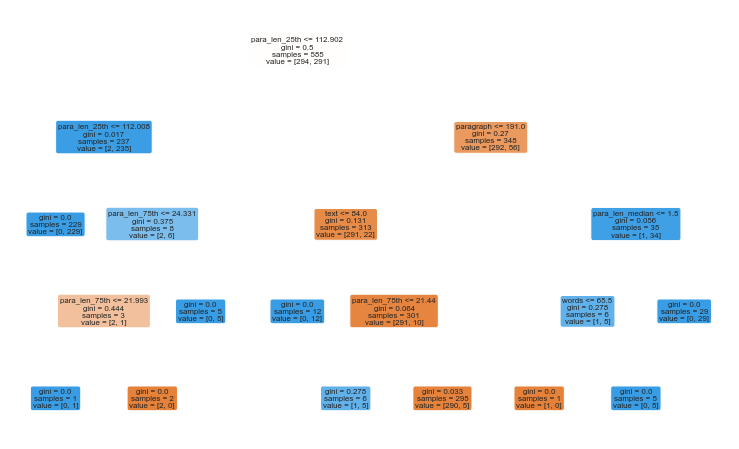

In [119]:
plot_tree(decision_tree, 
          feature_names = names,  
          filled = True, 
          rounded = True)

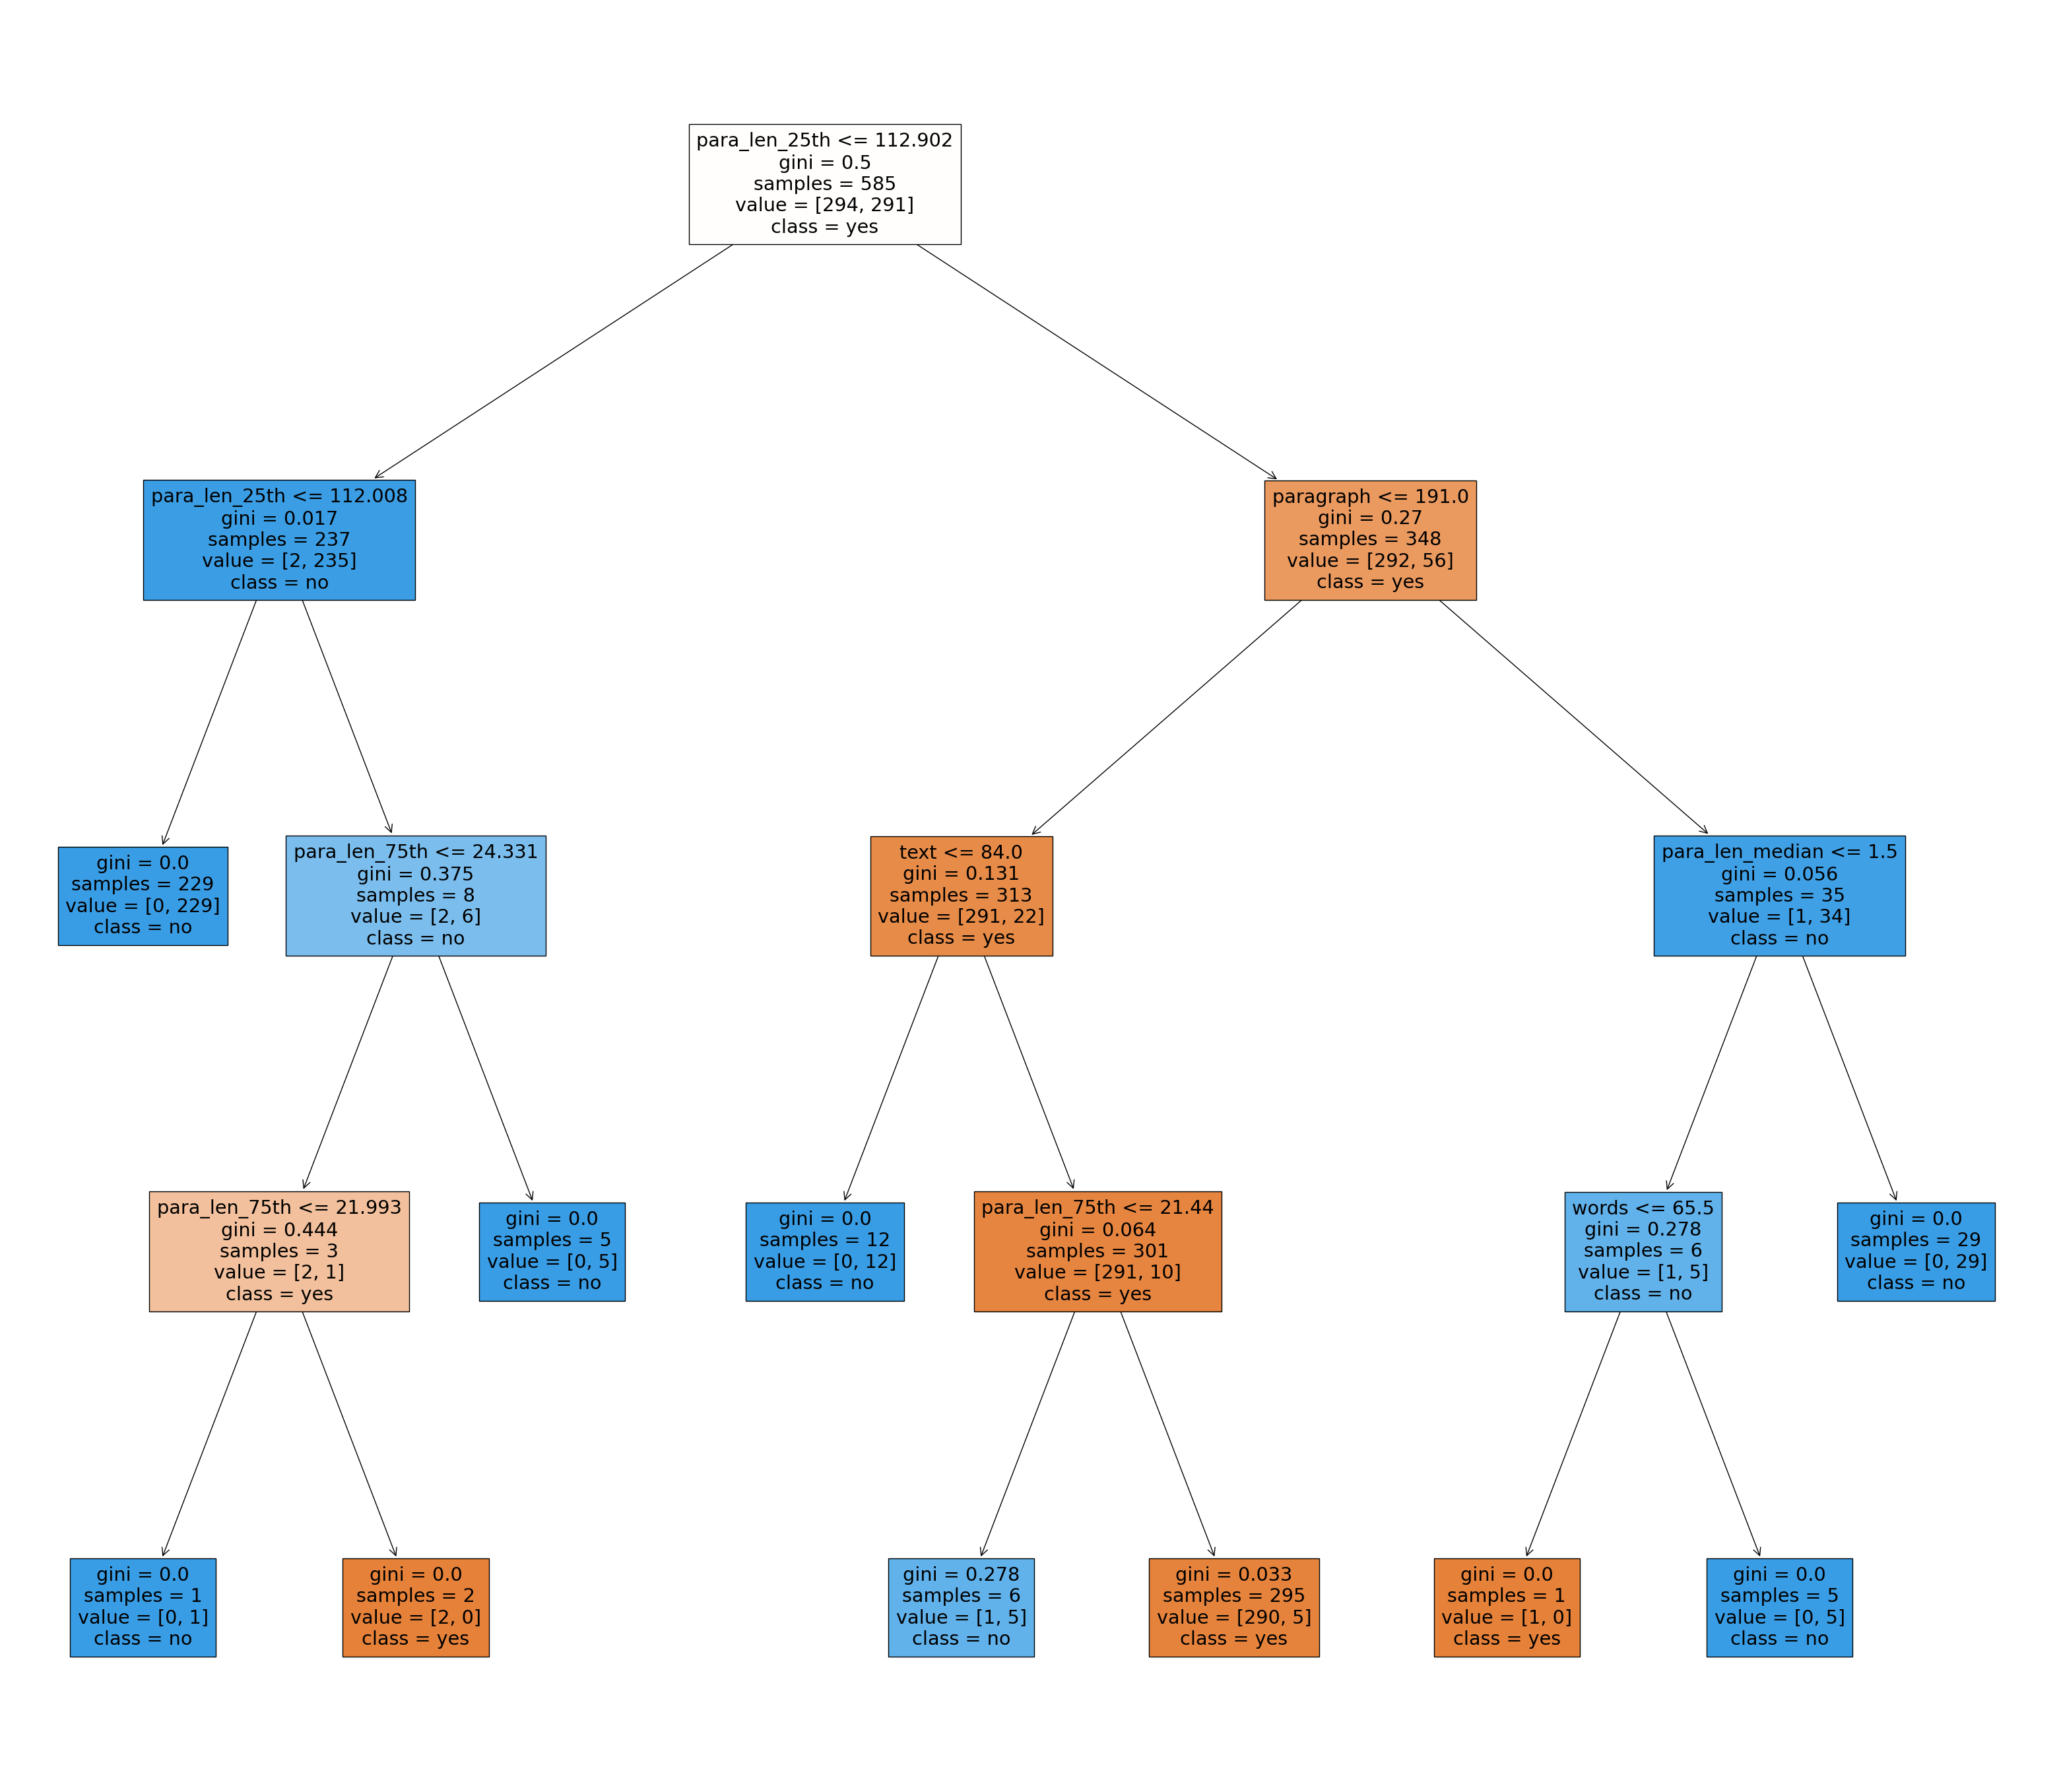

In [126]:
sns.reset_defaults()
fig = plt.figure(figsize=(40,35))
_ = tree.plot_tree(decision_tree, 
                   feature_names=names,  
                   class_names=['yes', 'no'],
                   filled=True)
plt.savefig('tree_visualization.png') 